In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./CC GENERAL.csv")
df.drop(labels=['CUST_ID', 'TENURE'], axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


### Preparing Data

In [3]:
missing = df.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

Fill Null values on MINIMUM_PAYMENTS and CREDIT_LIMIT with the median of values.

In [4]:
df.fillna(df.median(), inplace=True)

In [5]:
print(df.isna().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


### Normalization

In [6]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(df)
values = pd.DataFrame(values, columns=df.columns)
values.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0.039356,0.000787,0.091796,0.000000,0.091796,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962221,0.194178,0.134239,0.00000
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376517,0.098404,0.00002
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934207,0.077485,0.078135,0.00000
3,0.208887,0.000080,0.187872,0.187872,0.000000,0.025792,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.939988,0.000000,0.039147,0.00000
4,0.504298,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740060,0.418340,0.150967,0.00000


### Choosing n_cluster on KMeans based on three score algorithms
- SILHOUETTE SCORE
- DAVIES BOULDIN SCORE
- CALINSKI HARABASZ SCORE

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [8]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

labels = kmeans.labels_
silhouette = silhouette_score(values, labels=labels, metric='euclidean')
print('SILHOUETTE SCORE:', silhouette)
dbs = davies_bouldin_score(values, labels)
print('DAVIES BOULDIN SCORE:', dbs)
calinski = calinski_harabasz_score(values, labels)
print('CALINSKI HARABASZ SCORE:', calinski)

SILHOUETTE SCORE: 0.3644845919974304
DAVIES BOULDIN SCORE: 1.0757138590613295
CALINSKI HARABASZ SCORE: 3431.79374284143


The range of the silhouette score is [-1, 1], being 1 a totally perfect clustering both in separation and distance. So it can be affirmed that a more positive value (closer to 1 than to -1) for this score is a good sign of clustering. In the other hand, for the Davies Bouldin, the closer to zero, the better the score is, however, there is no max value to be compared. The Calinski Harabasz score also does not have a max limit, but the greater the better this metric is. A solution to quantify the clustering with these metrics is to make a relative validation, and ajust the model's parameters to maximize these scores.

In [9]:
def clustering_algorithm(n_clusters, dataset): 
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    kmeans.fit_predict(dataset)
    labels = kmeans.labels_
    silhouette = silhouette_score(dataset, labels=labels, metric='euclidean')
    dbs = davies_bouldin_score(dataset, labels)
    calinski = calinski_harabasz_score(dataset, labels)
    return silhouette, dbs, calinski

In [10]:
s1, dbs1, c1 = clustering_algorithm(3, values)
print(s1, dbs1, c1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [11]:
s2, dbs2, c2 = clustering_algorithm(5, values)
print(s2, dbs2, c2)

0.3645252169780562 1.0756224069224563 3431.798945679164


In [12]:
s3, dbs3, c3 = clustering_algorithm(20, values)
print(s3, dbs3, c3)

0.29436106043678334 1.2041705951803734 2394.7673073898573


### Cluster Validation

Comparing cluster metrics with random dataset

In [13]:
import numpy as np

random_data = np.random.rand(8950, 16)

s, dbs, c = clustering_algorithm(5, random_data)
print(s, dbs, c)
print(s2, dbs2, c2)

0.0391561208132146 3.6179537300138476 302.1640161160413
0.3645252169780562 1.0756224069224563 3431.798945679164


Comparing cluster metrics between subsets of the dataset, to ensure the clustering is stable

In [14]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, c1 = clustering_algorithm(5, set1)
s2, dbs2, c2 = clustering_algorithm(5, set2)
s3, dbs3, c3 = clustering_algorithm(5, set3)

pd.DataFrame([[s1, s2, s3],[dbs1, dbs2, dbs3],[c1, c2, c3]], 
             columns=['set1', 'set2', 'set3'], 
             index=['SILHOUETTE', 'DBS', 'CALINSKI'])


,set1,set2,set3
SILHOUETTE,0.369082,0.353218,0.367046
DBS,1.058045,1.142941,1.099043
CALINSKI,1204.055849,1194.940143,1167.532288


### Visualizing the Clusters, or trying to

Text(0, 0.5, 'Valor total gasto')

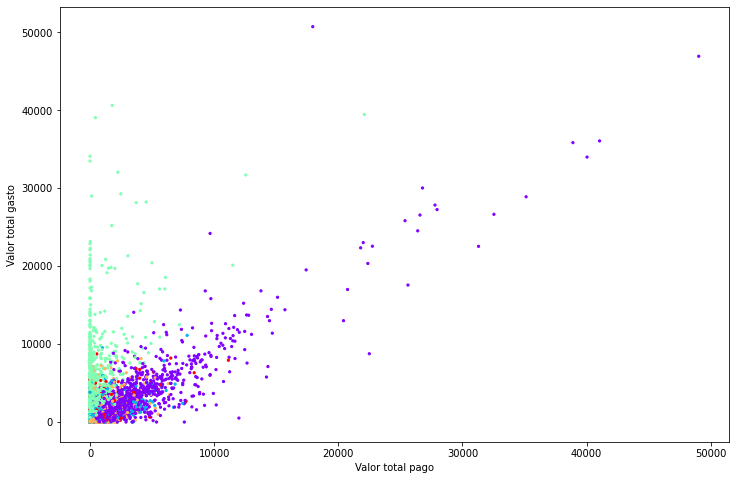

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(x=df['PURCHASES'], y=df['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')

### Understanding Cluster stats

The more attributes we have the more difficult the visualization becomes, it may be easier to analyse stats than it is with graphics.

In [17]:
df['cluster'] = labels
df.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1540.0  1142.222657  1664.035755   0.000000   211.566656   
1        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
2        1072.0  1794.024195  1982.950586   0.000000   506.925348   
3        3278.0   443.992358   846.597972   0.000000    23.315538   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         554.332740  1370.859355  19043.138560            1540.0  0.928053   
1        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
2        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
3          82.992153   411.193793   9630.367575            3278.0  0.774417   
4        1337.287314  2138.678431  11670.179850             411.0  0.989486   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       524.184580  18621.013310           1540.0  0.278582   
1        ...      1330.593643   8345.641905           2649.0  0.001799   
2        ...       884.718306  21235.065300           1072.0  0.117384   
3        ...       248.800040   4483.503862           3278.0  0.246549   
4        ...      7112.618584  76406.207520            411.0  0.019318   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.367203  0.0  0.0  0.083333  0.545455  1.0  
1        0.023260  0.0  0.0  0.000000  0.000000  0.6  
2        0.186853  0.0  0.0  0.083333  0.142857  1.0  
3        0.346601  0.0  0.0  0.000000  0.444444  1.0  
4        0.090901  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

To choose which attributes will be easier to visualize, it can be useful to compare the centroids of each dimension of the cluster, and analyse those with more variance.

In [18]:
centroids = kmeans.cluster_centers_
centroids

array([[1.59699490e-01, 2.45649360e-04, 4.38116859e-01, 2.56325660e-01,
        1.81962376e-01, 2.57889184e-02, 2.04826443e-04, 8.87914942e-05,
        1.51162866e-04, 9.36296056e-06, 1.69350945e-04, 6.17145756e-03,
        6.04336246e-01, 4.02584838e-01, 8.54128174e-02, 7.26645255e-05],
       [5.04263792e-01, 2.72194282e-04, 6.17808431e-02, 3.62269020e-02,
        2.55756543e-02, 2.52903017e-01, 6.73170559e-05, 2.56975193e-05,
        4.50651626e-05, 5.74388410e-05, 1.15687334e-03, 1.33194105e-03,
        7.19174706e-01, 1.66205262e-01, 1.79245673e-01, 5.52303554e-07],
       [2.35141479e-01, 2.16555293e-04, 6.03857074e-02, 3.44170171e-02,
        2.59739049e-02, 4.00128071e-01, 5.26401668e-05, 2.04882397e-05,
        3.51921361e-05, 6.54864556e-05, 1.57199032e-03, 1.12217156e-03,
        5.35089146e-01, 5.98040052e-01, 1.04348171e-01, 2.77498236e-05],
       [6.91386971e-02, 2.30552524e-04, 1.21267798e-01, 4.80255998e-02,
        7.33425496e-02, 2.43607736e-02, 1.72581896e-04, 3.370

In [19]:
max = len(centroids[0])
for i in range(max):
    print(df.columns.values[i], '{:.4f}'.format(centroids[:, i].var()))


BALANCE 0.0224
BALANCE_FREQUENCY 0.0000
PURCHASES 0.0196
ONEOFF_PURCHASES 0.0076
INSTALLMENTS_PURCHASES 0.0036
CASH_ADVANCE 0.0225
PURCHASES_FREQUENCY 0.0000
ONEOFF_PURCHASES_FREQUENCY 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
CASH_ADVANCE_FREQUENCY 0.0000
CASH_ADVANCE_TRX 0.0000
PURCHASES_TRX 0.0000
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280
MINIMUM_PAYMENTS 0.0543
PRC_FULL_PAYMENT 0.0000


The larger variances will be easier to visualize:

PURCHASES 0.0197

BALANCE 0.0223

CASH_ADVANCE 0.0225

PAYMENTS 0.0279

CREDIT_LIMIT 0.0362

MINIMUM_PAYMENTS 0.0549 -> Not relevant to analysis


In [20]:
description = df.groupby('cluster')[['BALANCE','PURCHASES','CASH_ADVANCE','PAYMENTS','CREDIT_LIMIT']]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT,n_clients
cluster,,,,,,
0,1142.222657,3268.886929,183.019398,3037.241495,4097.701397,1540
1,3037.962543,385.248630,1636.917210,968.890376,4495.771989,2649
2,1794.024195,475.494823,3270.246792,4709.556601,3976.372399,1072
3,443.992358,629.345171,141.569301,814.477150,5132.945933,3278
4,1987.501586,854.865815,421.129352,1336.238911,2227.737226,411


In [21]:
df.groupby("cluster")['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1540.0,0.278582,0.367203,0.0,0.0,0.083333,0.545455,1.0
1,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
2,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
3,3278.0,0.246549,0.346601,0.0,0.0,0.000000,0.444444,1.0
4,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0


CLUSTER 0:  Clients with lowest limit of Credit Card for user;
            Clients with bad full payment reputation;
            Lower number of clients.

            "SMALLEST CLUSTER, LOW LIMIT CREDIT CARD AND BAD PAYERS"

CLUSTER 1:  Clients with least balance amount left in their account to make purchases;
            Clients with least cash advance (withdraw) values;
            Clients with least amount of Payment done by user;
            Clients with highest limit of Credit Card for user;
            Clients with good full payment reputation;
            Higher number of clients.

            "LARGEST CLUSTER, GOOD PAYERS, HIGH LIMIT CREDIT CARD, BUT DOESN'T SPEND AND LOW BALANCE ON ACCOUNT"

CLUSTER 2:  Clients with most balance amount left in their account to make purchases;
            Clients with least amount of purchases made from account;
            Clients with bad full payment reputation.

            "BAD PAYERS, HIGH BALANCE ON ACCOUNT, BUT DON'T SPEND MUCH, MAINLY IN CASH"

CLUSTER 3:  Clients with most cash advance (withdraw) values;
            Clients with most amount of Payment done by user.

            "SPENDS THE MOST, AND WITH CASH, MEDIAN PAYMENT REPUTATION"

CLUSTER 4:  Clients with most amount of purchases made from account;
            Clients with good full payment reputation.
        
            "BUYERS WITH HIGH FULL PAYMENT PERCENT"

ACTIONLOG:

- Cluster 1 is the largest, its interesting to make a campaign so that these clients spend more.
- Cluster 4 is large and formed mainly by good buyers and payers, its interesting to raise credit limit for these clients.

Implement actions with AB Testing to ensure cause/consequence of the results:

Example:
On Cluster 1, divide the cluster in two groups: Control and Campaign. In the end of the campaign compare the results.